# 一起来打怪之 Credit Scoring 练习

---
## 作业说明

- 答题步骤：
    - 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
    - 请养成代码注释的好习惯

- 解题思路：
    - 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
    - 解题思路**仅供参考**，鼓励原创解题方法
    - 为督促同学们自己思考，解题思路内容设置为**白色**，必要时请从冒号后拖动鼠标查看

- 所用数据
    - 请注意导入数据库后先**查看和了解数据的基本性质**，后面的问题不再一一提醒

## machine learning for credit scoring


Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. [Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

Attribute Information:

|Variable Name	|	Description	|	Type|
|----|----|----|
|SeriousDlqin2yrs	|	Person experienced 90 days past due delinquency or worse 	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	Total balance on credit divided by the sum of credit limits	|	percentage|
|age	|	Age of borrower in years	|	integer|
|NumberOfTime30-59DaysPastDueNotWorse	|	Number of times borrower has been 30-59 days past due |	integer|
|DebtRatio	|	Monthly debt payments	|	percentage|
|MonthlyIncome	|	Monthly income	|	real|
|NumberOfOpenCreditLinesAndLoans	|	Number of Open loans |	integer|
|NumberOfTimes90DaysLate	|	Number of times borrower has been 90 days or more past due.	|	integer|
|NumberRealEstateLoansOrLines	|	Number of mortgage and real estate loans	|	integer|
|NumberOfTime60-89DaysPastDueNotWorse	|	Number of times borrower has been 60-89 days past due |integer|
|NumberOfDependents	|	Number of dependents in family	|	integer|


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

----------
## Read the data into Pandas 

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [3]:
data.shape

(112915, 11)

------------
## Drop na

In [6]:
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [7]:
data.dropna(inplace=True)
data.shape

(108648, 11)

---------
## Create X and y

In [8]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

In [9]:
X

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
112910,0.385742,50.0,0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0
112911,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0
112912,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0
112913,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0


In [10]:
y.mean()

0.06742876076872101

---
## 练习1：把数据切分成训练集和测试集
- 提示：<span style='color:white'>from sklearn.model_selection import train_test_split('Gender') </span>

In [11]:
## your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=20)

# 查看数据的维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((86918, 10), (21730, 10), (86918,), (21730,))

----
## 练习2：使用logistic regression/决策树/SVM/KNN...等sklearn分类算法进行分类
尝试查sklearn API了解模型参数含义，调整不同的参数

### Logistic regression
- 提示：<span style='color:white'>from sklearn import linear_model('Gender') </span>

In [12]:
## your code here
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000)# default max_iter(100) is too small to converge.
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#### see confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[20247,    53],
       [ 1359,    71]])

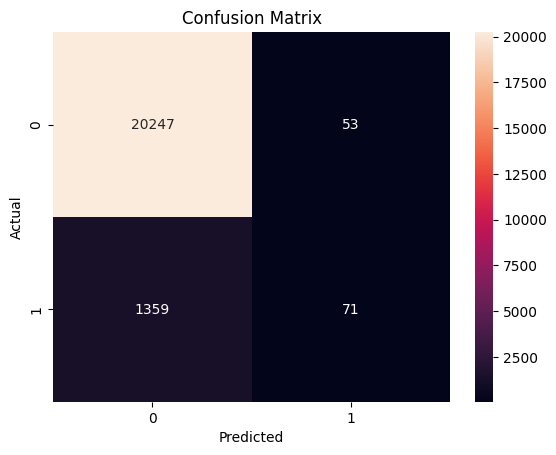

In [14]:
sns.heatmap(cm, annot = True, fmt = 'd')# annot = True: show the numbers in each heatmap cell
                                        # fmt = 'd': show numbers as integers. 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
R = cm[0,0] + cm[1,1]
All = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
R/All  ## calculate the right rate manually 

0.935020708697653

In [16]:
model.score(X_test, y_test) # Return the mean accuracy on the given test data and labels

0.935020708697653

### Decision Tree
- 提示：<span style='color:white'>from sklearn.tree import DecisionTreeClassifier('Gender') </span>

In [21]:
## your code here
from sklearn.tree import DecisionTreeClassifier
D_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 3)# max_depth prevent overfitting
D_tree.fit(X_train, y_train)
y_pred = D_tree.predict(X_test)

In [22]:
D_tree_cm = confusion_matrix(y_test, y_pred)
D_tree_cm

array([[20091,   209],
       [ 1196,   234]])

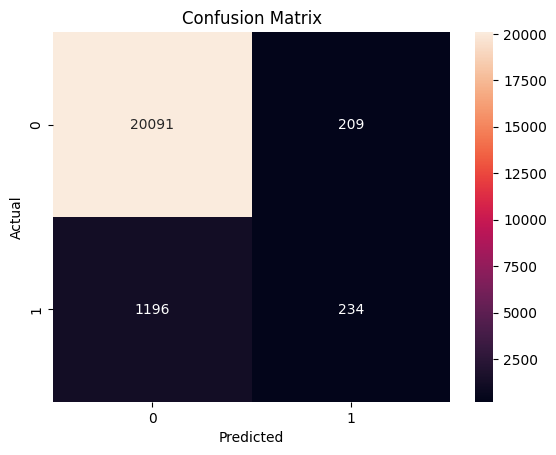

In [23]:
sns.heatmap(D_tree_cm, annot = True, fmt = 'd')# annot = True: show the numbers in each heatmap cell
                                        # fmt = 'd': show numbers as integers. 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
D_tree.score(X_test, y_test) # Return the mean accuracy on the given test data and labels

0.9353428439944776

### Random Forest
- 提示：<span style='color:white'>from sklearn.ensemble import RandomForestClassifier('Gender') </span>

In [32]:
## your code here
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', 
                                n_estimators=4, # The number of trees in the forest.
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
sore_RF= forest.score(X_test, y_test) # Return the mean accuracy on the given test data and labels
print(y_predicted)
print('The sore:', sore_RF)

[0 0 0 ... 0 0 0]
The sore: 0.9319834330418776


[[20061   239]
 [ 1239   191]]


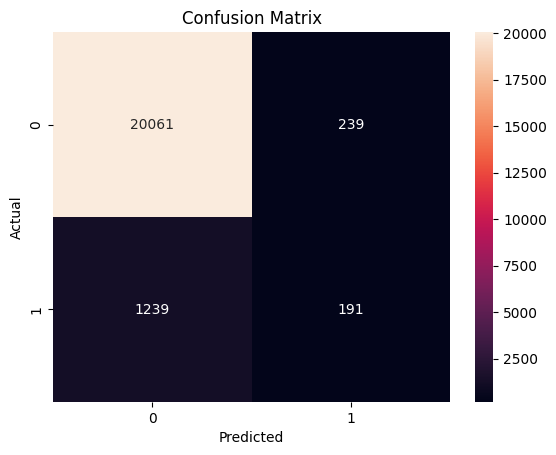

In [33]:
forest_cm = confusion_matrix(y_test, y_pred)
print(forest_cm)

sns.heatmap(forest_cm, annot = True, fmt = 'd')# annot = True: show the numbers in each heatmap cell
                                        # fmt = 'd': show numbers as integers. 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### SVM
- 提示：<span style='color:white'>from sklearn.svm import SVC('Gender') </span>

In [30]:
## your code here
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
sore_svm= svm.score(X_test, y_test) # Return the mean accuracy on the given test data and labels
print(y_predicted)
print('The sore:', sore_svm)


[0 0 0 ... 0 0 0]
The sore: 0.9341923607915325


[[20300     0]
 [ 1430     0]]


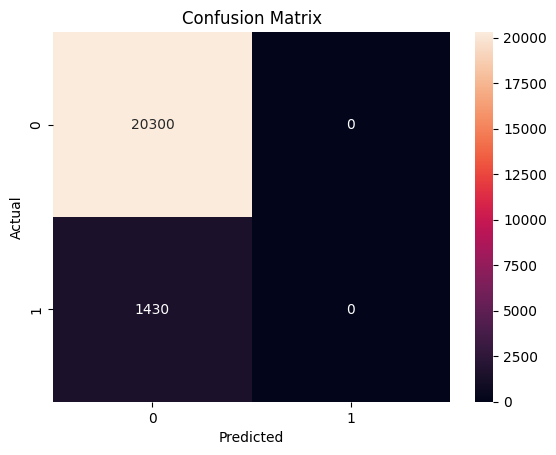

In [31]:
svm_cm = confusion_matrix(y_test, y_pred)
print(svm_cm)

sns.heatmap(svm_cm, annot = True, fmt = 'd')# annot = True: show the numbers in each heatmap cell
                                        # fmt = 'd': show numbers as integers. 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### KNN
- 提示：<span style='color:white'>from sklearn.neighbors import KNeighborsClassifier('Gender') </span>

In [38]:
## your code here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
sore_knn= knn.score(X_test, y_test) # Return the mean accuracy on the given test data and labels
print('The sore:', sore_knn)

The sore: 0.9332719742291763


[[20251    49]
 [ 1401    29]]


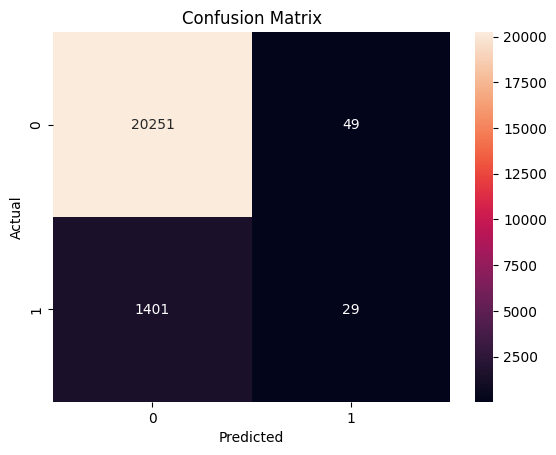

In [39]:
knn_cm = confusion_matrix(y_test, y_pred)
print(knn_cm)

sns.heatmap(knn_cm, annot = True, fmt = 'd')# annot = True: show the numbers in each heatmap cell
                                        # fmt = 'd': show numbers as integers. 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

---

## 练习3：在测试集上进行预测，计算准确度

### Logistic regression
- 提示：<span style='color:white'>y_pred_LR = clf_LR.predict(x_test)('Gender') </span>

In [42]:
## your code here
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model.predict(X_test))

0.935020708697653

### Decision Tree
- 提示：<span style='color:white'>y_pred_tree = tree.predict(x_test)('Gender') </span>

In [43]:
## your code here
accuracy_score(y_test, D_tree.predict(X_test))

0.9353428439944776

### Random Forest
- 提示：<span style='color:white'>y_pred_forest = forest.predict(x_test)('Gender') </span>

In [44]:
## your code here
accuracy_score(y_test, forest.predict(X_test))

0.9319834330418776

### SVM
- 提示：<span style='color:white'>y_pred_SVC = clf_svc.predict(x_test)('Gender') </span>

In [46]:
## your code here
accuracy_score(y_test, svm.predict(X_test))

0.9341923607915325

### KNN
- 提示：<span style='color:white'>y_pred_KNN = neigh.predict(x_test)('Gender') </span>

In [47]:
## your code here
accuracy_score(y_test, knn.predict(X_test))

0.9332719742291763

---
## 练习4：查看sklearn的官方说明，了解分类问题的评估标准，并对此例进行评估

**混淆矩阵（Confusion Matrix）相关学习链接**

- Blog:<br>
http://blog.csdn.net/vesper305/article/details/44927047<br>
- WiKi:<br>
http://en.wikipedia.org/wiki/Confusion_matrix<br>
- sklearn doc:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [50]:
## your code here
## confusion Matrix 已经写在练习2中

# def 
print('Confusion Matrix of logistic regression:')
print(cm)

print('Confusion Matrix of Decision Tree:')
print(D_tree_cm)

print('Confusion Matrix of Random Forest:')
print(forest_cm)

print('Confusion Matrix of SVM:')
print(svm_cm)

print('Confusion Matrix of KNN:')
print(knn_cm)



Confusion Matrix of logistic regression:
[[20247    53]
 [ 1359    71]]
Confusion Matrix of Decision Tree:
[[20091   209]
 [ 1196   234]]
Confusion Matrix of Random Forest:
[[20061   239]
 [ 1239   191]]
Confusion Matrix of SVM:
[[20300     0]
 [ 1430     0]]
Confusion Matrix of KNN:
[[20251    49]
 [ 1401    29]]


## 练习5：调整模型的标准

银行通常会有更严格的要求，因为fraud带来的后果通常比较严重，一般我们会调整模型的标准。<br>

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”，试试看把阈值设定为0.3，再看看这时的评估指标(主要是准确率和召回率)。

- 提示：<span style='color:white'>sklearn的很多分类模型，predict_prob可以拿到预估的概率，可以根据它和设定的阈值大小去判断最终结果(分类类别)('Gender') </span>

Precision:
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

Accuracy:  Number of correct predictions/Total number of predictions

Recall:
The recall is the measure of our model correctly identifying True Positives. Thus, for all the patients who actually have heart disease, recall tells us how many we correctly identified as having a heart disease. Mathematically:

In [62]:
## your code here
## your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score

lr = LogisticRegression(max_iter = 1000)# default max_iter(100) is too small to converge.
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
accurracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Default values')
print(accurracy)
print(precision)
print(recall)

Default values
0.935020708697653
0.5725806451612904
0.04965034965034965


In [63]:
threshold = 0.3
y_pred_threshold = (lr.predict_proba(X_test)[:,1] > 0.3).astype(int)
print(y_pred_threshold)

[0 0 0 ... 0 0 0]


In [64]:
accurracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)

print('Values corresponding to threshold = 0.3')
print(accurracy)
print(precision)
print(recall)

Values corresponding to threshold = 0.3
0.934054302807179
0.4954128440366973
0.11328671328671329


### conclusion:
Using 0.3 as threhold increases the recall significantly, does not change accuracy significantly and decreases precision a little.
